## 1. Distribution Plots
let's discuss some plots that allows us to visualise the distribution of a DataSets. These Plots are:
   - distplot
   - jointplot
   - pairplot
   - rugplot
   - kdeplot

In [1]:
import seaborn as sns
%matplotlib inline

### Data:
Seaborn comes with some built-in Data sets.

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Displot
shows the distribution of a univariate set of observations.
- we can also say Histplot: ".histplot()"

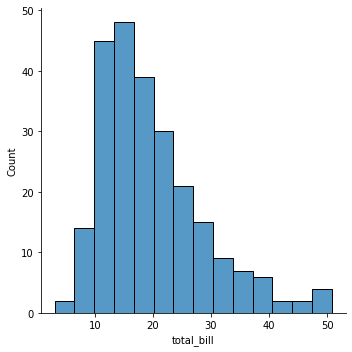

In [15]:
sns.displot(tips['total_bill'])

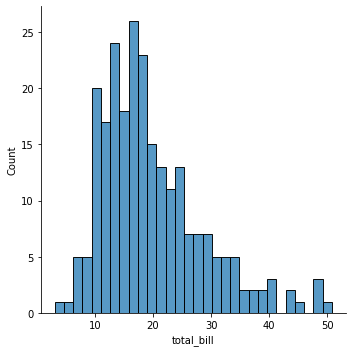

In [16]:
sns.displot(tips['total_bill'],bins=30)

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

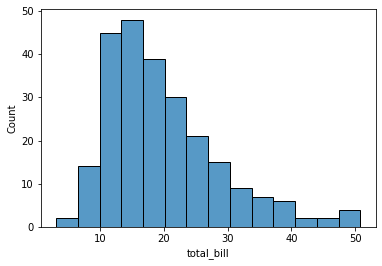

In [17]:
sns.histplot(tips['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

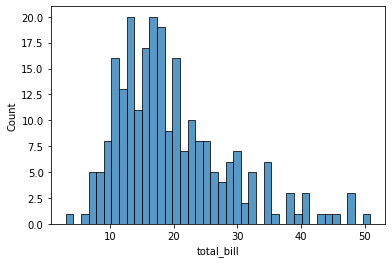

In [18]:
sns.histplot(tips['total_bill'],bins=40)

/home/bijaythapa/Documents/GoGreen/ProjectOne/prjone/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

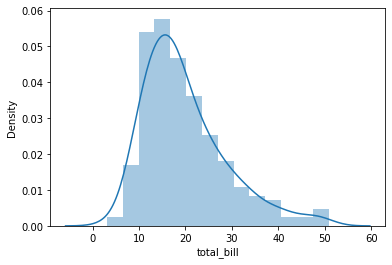

In [11]:
# deprecated
sns.distplot(tips['total_bill'])

/home/bijaythapa/Documents/GoGreen/ProjectOne/prjone/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

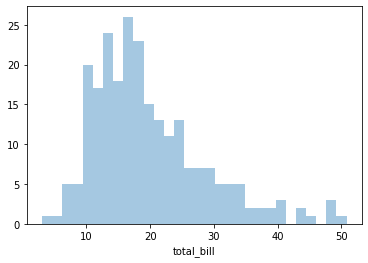

In [13]:
# to remove KDE layer, give parameter 'kde=False'
sns.distplot(tips['total_bill'],kde=False,bins=30)

## Joint Plot
allows us to basically match-up two 'displot' for bivariate data (and also for univariate data).
with the choice of "kind" parameter to compare with.
- scatter (default)
- reg (regression)
- resid
- kde (kernal density estimate) (shows the density of points match ip the most)
- hex (hexagon distribution representation)

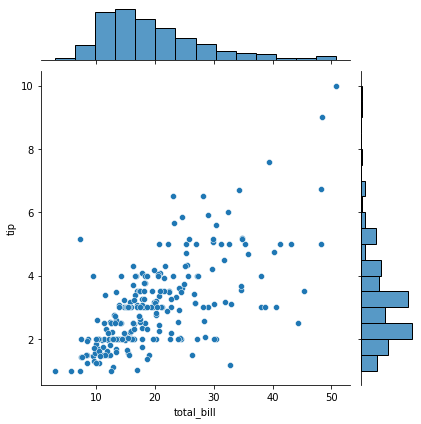

In [5]:
sns.jointplot(x='total_bill',y='tip',data=tips)

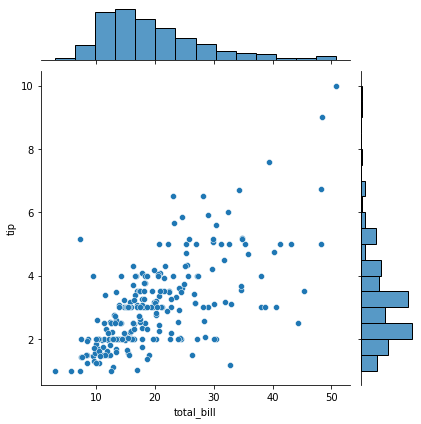

In [10]:
# kind='scatter' is default
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

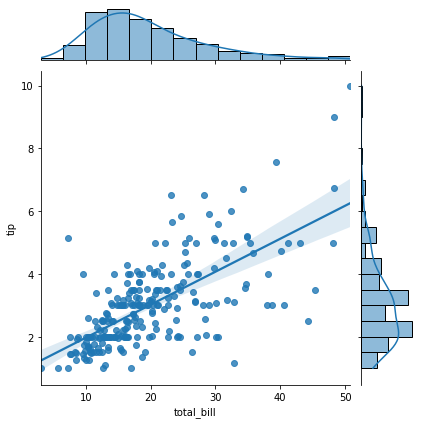

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

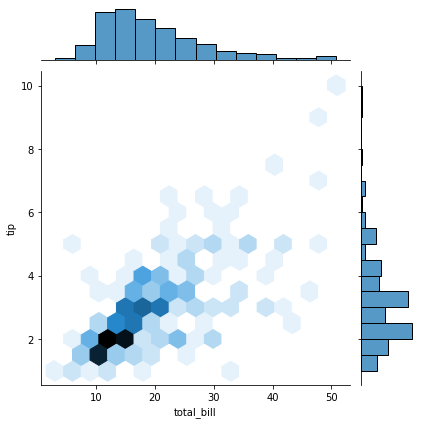

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

## Pair Plot
plots pairwise relationships across entire DataFrame (at least for numerical columns).
and also supports a color 'hue' argument for categorical columns.
what is actually does is: gives 'jointplot' for every single possible combination of numerical columns of the DF.
The larger the DF, the longer the pairplots takes times to load.

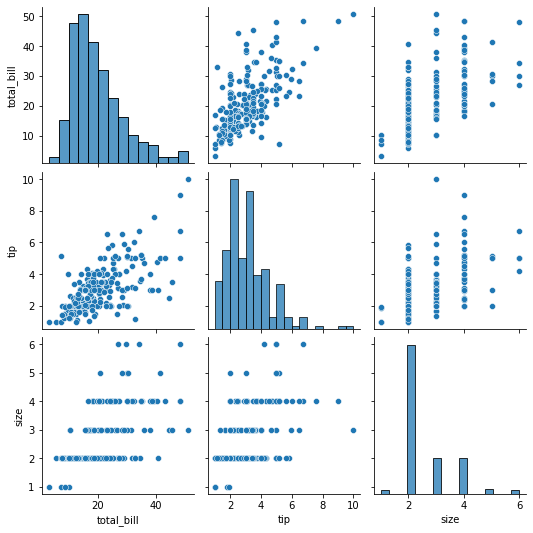

In [13]:
sns.pairplot(tips)

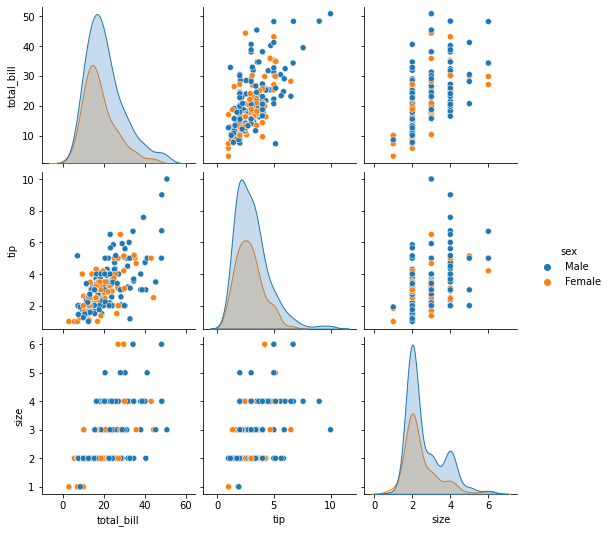

In [17]:
sns.pairplot(data=tips,hue='sex')

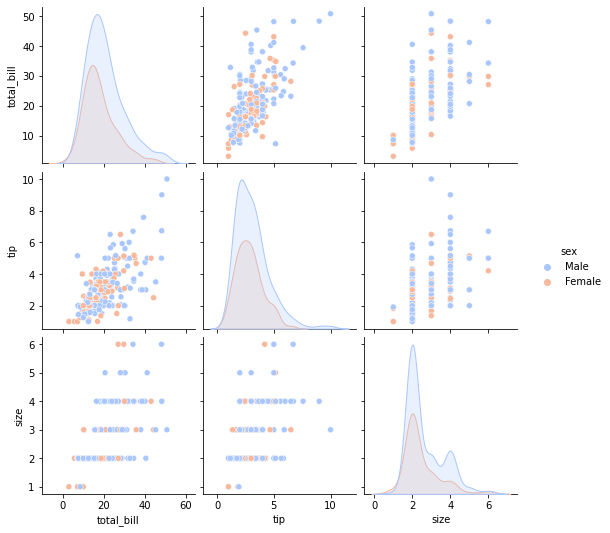

In [15]:
sns.pairplot(data=tips,hue='sex',palette='coolwarm')

## RugPlot
actually a very simple concept. It just draw a 'dash' mark for every point of univariate distribution.
They are building block of KDE. This funtion works only for the numeric column of Data set.

histogram vs rugplot: histogram essentially has bins and it counts how many dashes are in that bin and shows us a number in top of bin.
This function is intended to complement other plots by showing the location of individual observations in an ubobstrusive way.

<AxesSubplot:xlabel='total_bill'>

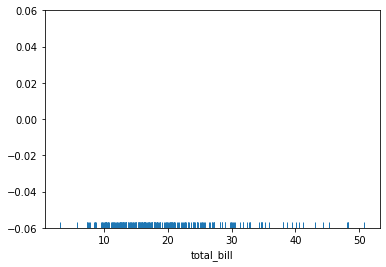

In [19]:
sns.rugplot(tips['total_bill'])

<AxesSubplot:xlabel='tip'>

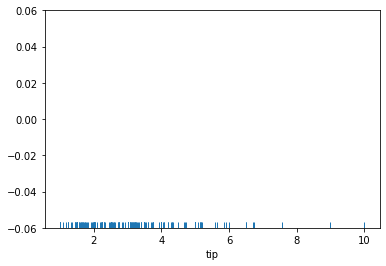

In [23]:
sns.rugplot(tips['tip'])

### KDE Plot:
- Kernal Density Estimate or Estimation Plot
- These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value.
- works only on numeric columns of Data set.

KDE plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a contineous probablity density curve in one or more dimenstions.

(0.0, 1.0)

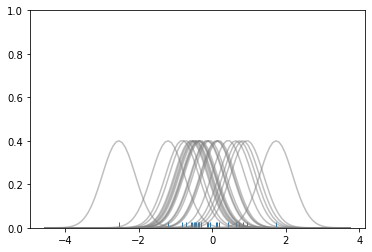

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# create dataset
dataset = np.random.randn(25)

# create another rugplot
sns.rugplot(dataset)

# set up x-axis for plot
x_min = dataset.min()-2
x_max = dataset.max()+2

# 100 equally spaced points between x_min and x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

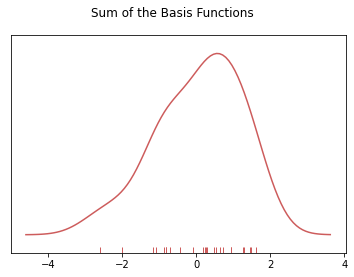

In [3]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<AxesSubplot:xlabel='tip', ylabel='Density'>

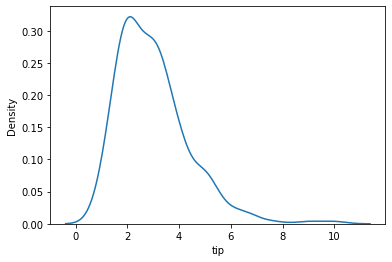

In [24]:
sns.kdeplot(tips['tip'])

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

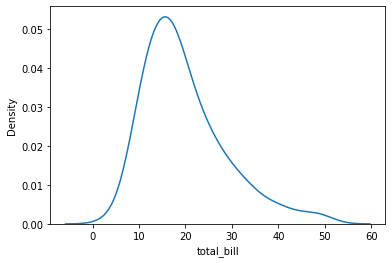

In [25]:
sns.kdeplot(tips['total_bill'])

In [29]:
# sns.kdeplot(tips['time'])

Great Work !!